In [1]:
#导入表
import pandas as pd
df=pd.read_excel('text_analysis_ad_sample.xlsx')

In [2]:
print(df.head())

   Unnamed: 0  index                                              商品名称  商品类别  \
0           0   1596                                五华牌香烟[May Blossom]  烟草制品   
1           1   5627  韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People]    药品   
2           2  13532                   大炮台香烟[Three Castles Cigarettes]  烟草制品   
3           3   1133                                婴孩自己药片[Baby's Own]    药品   
4           4   3146                                     亚士北罗药片[Aspro]    药品   

    出版年                                               广告文本  \
0  1932  兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟  二十枝装每包售国币大洋二角 五十枝装每罐售国币...   
1  1918  讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...   
2  1935                                  香味馥郁,不让名花 另有三炮台出售   
3  1930  差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...   
4  1933  何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...   

                              广告标题  
0    五华牌香烟,"兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"  
1        韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'  
2                大炮台香烟,"香味馥郁 不让名花" 

In [ ]:
import jieba
from tqdm import tqdm
tqdm.pandas()
def clean_text(text):
    words=jieba.lcut(text)
    return ' '.join(words)


df['广告文本分词']=df['广告文本'].progress_apply(clean_text)


  0%|          | 0/500 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\12490\AppData\Local\Temp\jieba.cache
Loading model cost 0.728 seconds.
Prefix dict has been built successfully.
100%|██████████| 500/500 [00:01<00:00, 371.43it/s]


In [4]:
print(df['广告文本分词'].head())

0    兰勃 脱白 脱勒 公司   五华 牌 香烟   佛及 尼埃 香烟     二十 枝装 每包 ...
1    讲求 卫生 为 人生 本性 天理 固然 也   人生 首贵 逐日 大便 通畅 有序 为 天然...
2                          香味 馥郁 , 不让 名花   另 有 三 炮台 出售
3    差肩 儿女   秀慧 康强   闽有 佳音 讃 羡 婴孩 自己 药片   每年 此际 小儿 ...
4    何以 亚士 北罗 是 妇女 们 的 腻友 ？ 各国 妇女 力证 亚士 北罗 药片 是 她们 ...
Name: 广告文本分词, dtype: object


In [6]:
from gensim.test.utils import common_texts
print(common_texts)

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


In [7]:
sentences=df['广告文本分词'].apply(lambda x: x.split()).tolist()
print(sentences)

[['兰勃', '脱白', '脱勒', '公司', '五华', '牌', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '售', '国币', '大洋', '二角', '五十', '枝装', '每罐', '售', '国币', '大洋', '五角'], ['讲求', '卫生', '为', '人生', '本性', '天理', '固然', '也', '人生', '首贵', '逐日', '大便', '通畅', '有序', '为', '天然', '所当', '如此', '也', '如若', '大便', '不利', '大', '肠阻塞', '则', '胃失', '消化', '疾病', '头痛', '肝火', '上升', '胆汁', '不', '调', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '而', '起', '矣', '凡', '此皆须', '服用', '韦廉士', '大', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '之', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '城', '医生', '学', '研究会', '*', '生', '先生', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '于是', '常为', '服用', '身体', '爽健为', '半生', '以来', '所', '未有', '也', '如', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '至', '上海', '四川', '路', '九十六', '号', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶', '可', '也'], ['香味', '馥郁', ',', '不让', '名花', '另', '有', '三', '炮台', '出售'], ['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '讃', '羡',

In [8]:
from gensim.models import Word2Vec
model=Word2Vec(sentences)

In [9]:
word_list=model.wv.index_to_key
word_vectors=model.wv[word_list]
for word,vector in list(zip(word_list,word_vectors))[0:10]:
    print(word,vector)


之 [-0.5541698   0.6543888   0.04342655 -0.34251264 -0.31743136 -1.4834355
  0.77579737  1.7199482  -0.40891567 -0.41682065 -0.08434306 -1.3865645
 -0.15633912  0.54583853  0.08826262 -0.52088654 -0.09983176 -0.51986617
  0.12172616 -1.2235237   0.72741604  0.1006637   0.09159175 -0.1759735
 -0.04425296 -0.06277391  0.07797035 -0.6204547  -0.80658686 -0.22161962
  0.93621373  0.11875968  0.2677655  -0.26360914 -0.26138058  1.3053777
  0.39979666 -0.82761115 -0.4819602  -1.5475564   0.07030024 -0.35215062
 -0.15597486  0.07385722  0.7369704  -0.31673083 -0.76648957 -0.01878503
  0.6484119   0.23674339  0.3214937  -0.58810526 -0.41082713 -0.06126788
 -0.00399961  0.26683882  0.30919477 -0.07792092 -0.53887933  0.07385541
  0.15055306  0.33657435 -0.39534938 -0.02372331 -0.6325668   0.71120137
  0.13575499  0.776704   -0.6477354   1.2250711  -0.612408    0.4358298
  0.47927132 -0.2523724   1.0393221   0.39810482  0.20002045 -0.20048636
 -0.5862017   0.07579202 -0.3621378   0.2421802  -0.63

In [10]:
model.wv.most_similar('卫生')

[('亦', 0.9996462464332581),
 ('皮肤', 0.9996020793914795),
 ('又', 0.999588668346405),
 ('能', 0.999588131904602),
 ('一切', 0.9995815753936768),
 ('而', 0.9995783567428589),
 ('如', 0.9995729327201843),
 ('及', 0.9995715618133545),
 ('治愈', 0.999564528465271),
 ('身体', 0.9995636940002441)]

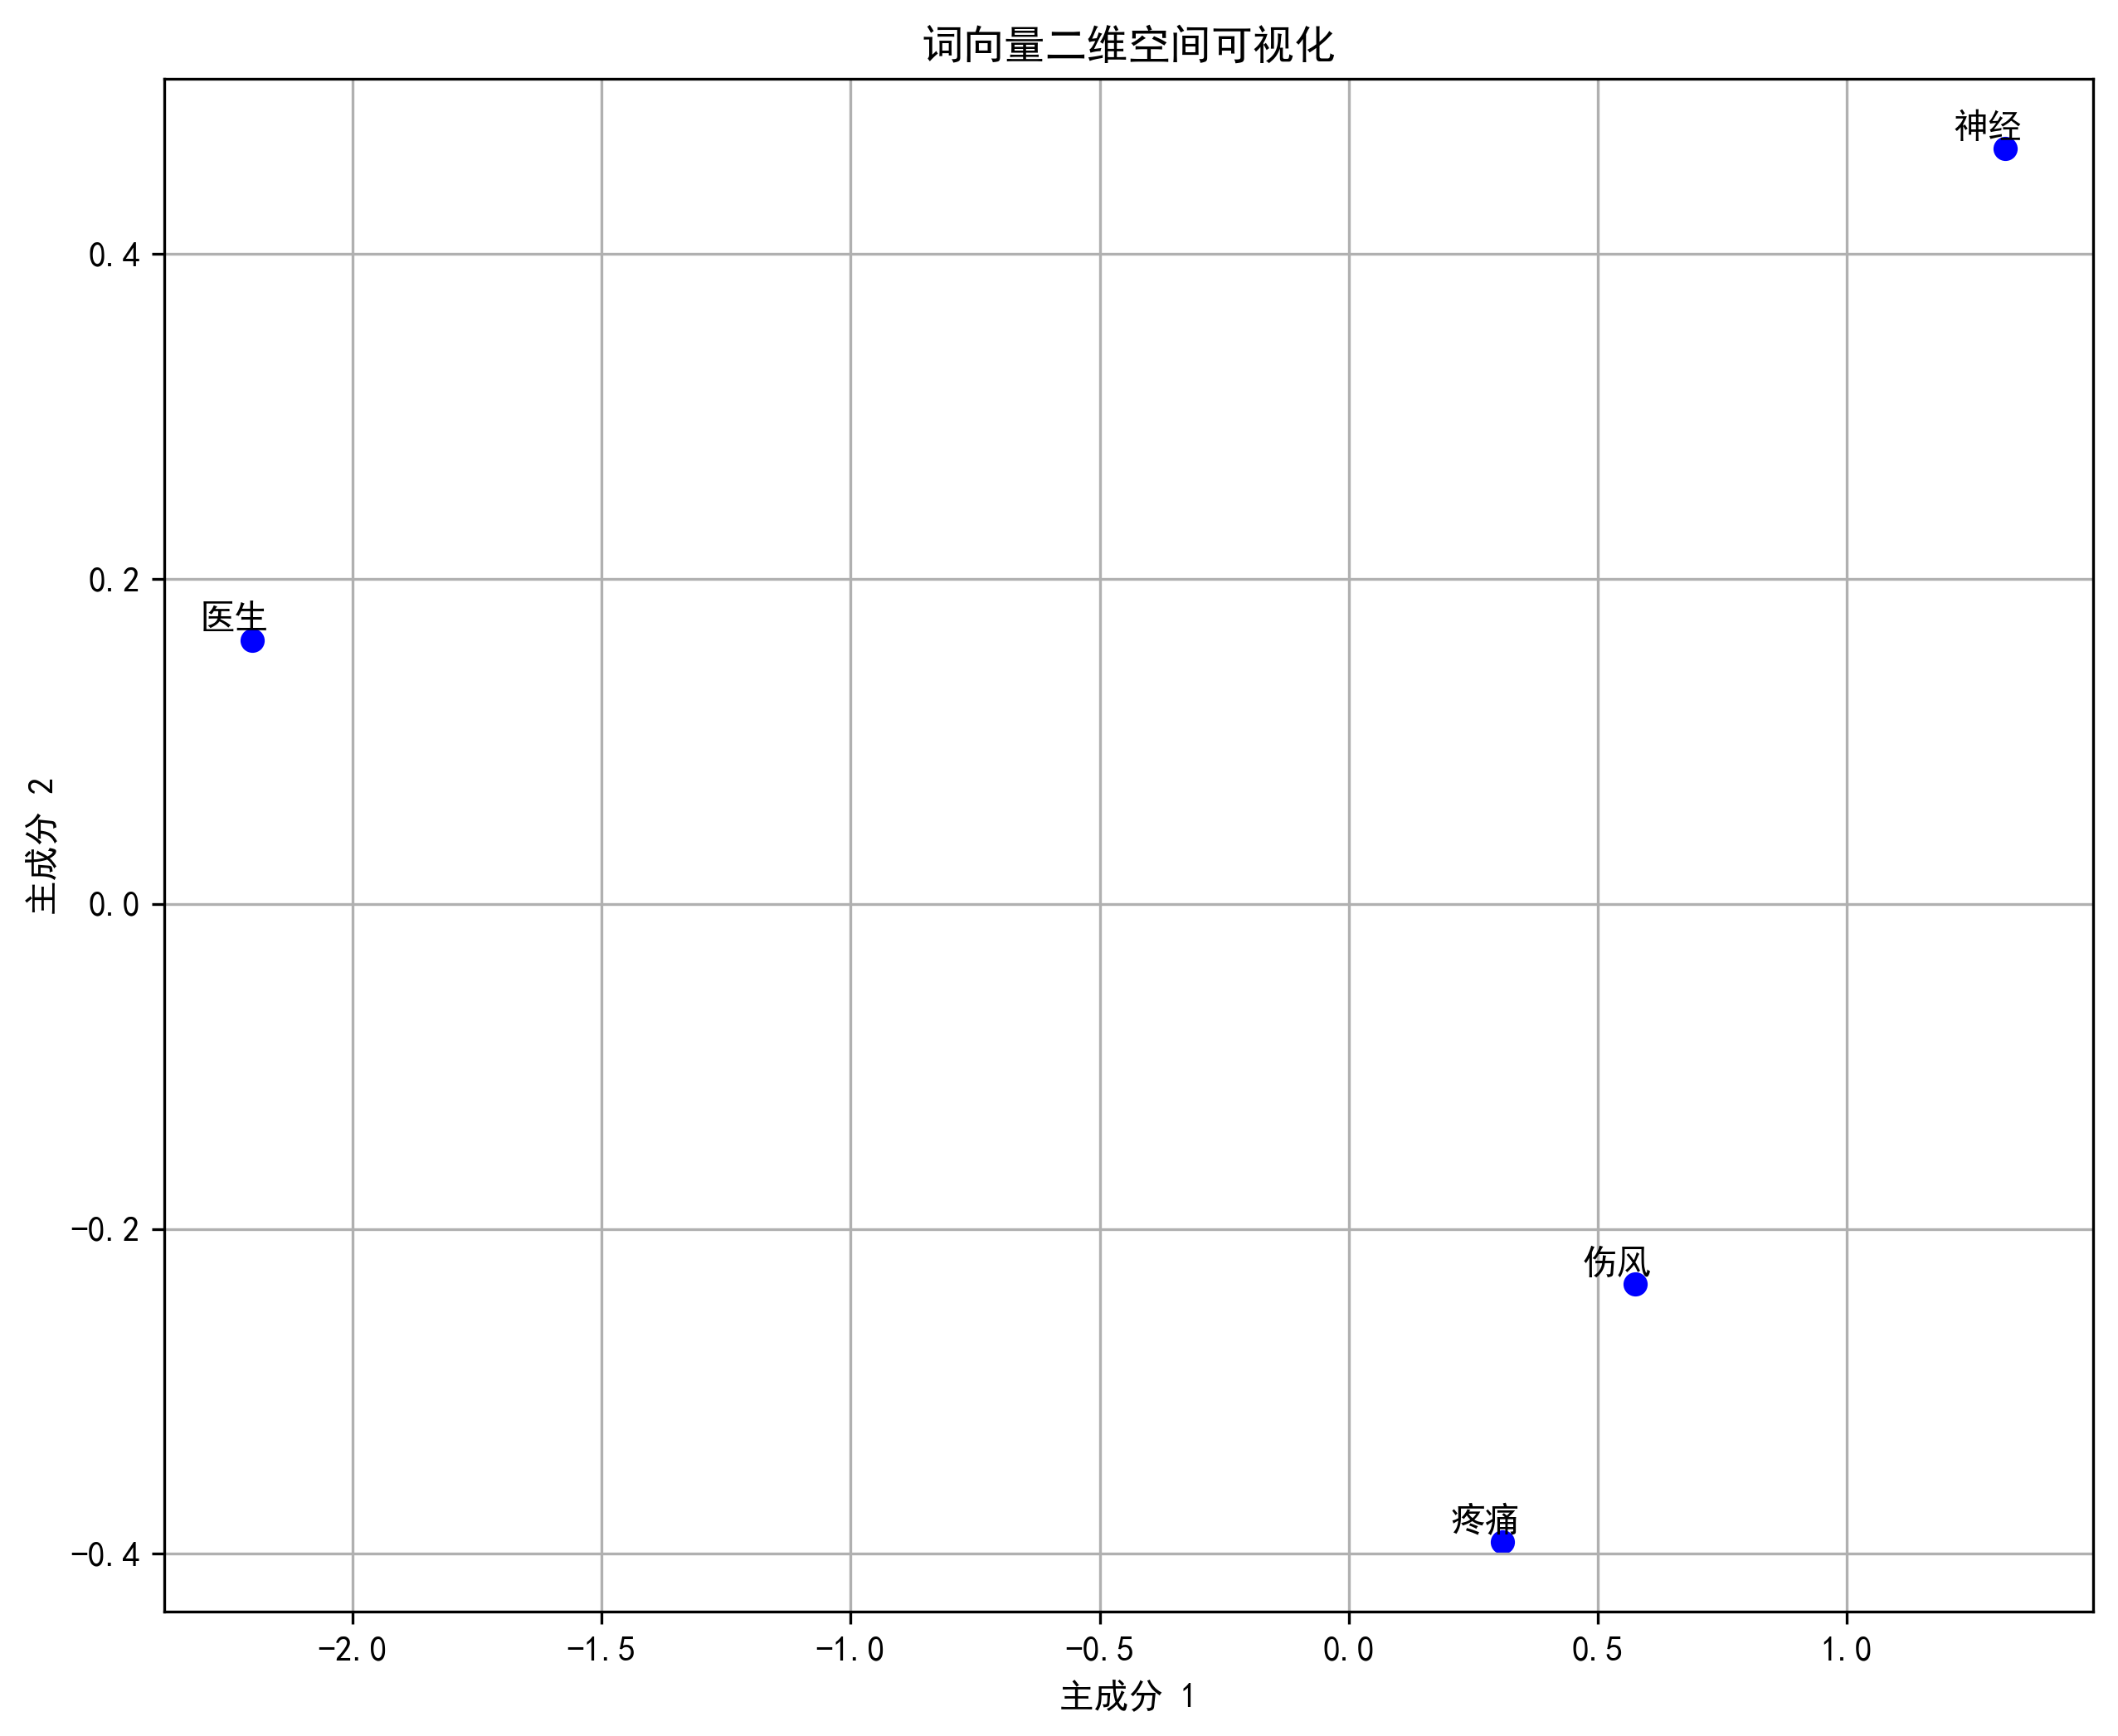

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# 训练 Word2Vec 模型
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# 定义要绘制的词列表
words = ['医生', '疼痛', '神经', '伤风']

# 获取词向量
word_vectors = np.array([model.wv[word] for word in words if word in model.wv])
valid_words = [word for word in words if word in model.wv]

# 使用 PCA 降维到二维
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘制词向量的二维表示
plt.figure(figsize=(10, 8))
for i, word in enumerate(valid_words):
    x, y = word_vectors_2d[i, :]
    plt.scatter(x, y, marker='o', color='b')
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.title('词向量二维空间可视化')
plt.xlabel('主成分 1')
plt.ylabel('主成分 2')
plt.grid(True)
plt.show()